<a href="https://colab.research.google.com/github/alexmacharia/deep_learning_projects/blob/main/Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [7]:
data_path = '/content/gdrive/MyDrive/deep_learning/data/Spam-Classification.csv'

In [19]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
 


In [8]:
spam_data = pd.read_csv(data_path)

spam_data.head()

,CLASS,SMS
0,ham,"said kiss, kiss, i can't do the sound effects..."
1,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4,spam,**FREE MESSAGE**Thanks for using the Auction S...


In [9]:
spam_classes = spam_data['CLASS']
spam_messages = spam_data['SMS']

In [15]:
def customtokenize(str):
    tokens = nltk.word_tokenize(str)
    nostop = list(filter(lambda token:token not in stopwords.words('english'), tokens))
    lemmatized = [lemmatizer.lemmatize(word) for word in nostop]
    return lemmatized



In [16]:
vectorizer = TfidfVectorizer(tokenizer=customtokenize)

In [20]:
tfidf = vectorizer.fit_transform(spam_messages)

tfidf_array = tfidf.toarray()

In [26]:
label_encoder = LabelEncoder()
spam_classes = label_encoder.fit_transform(spam_classes)

spam_classes = to_categorical(spam_classes, 2)

In [27]:
print(tfidf.shape)
print(spam_classes.shape)

(1500, 4569)
(1500, 2)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_array, spam_classes, test_size=0.10)

In [29]:
num_classes = 2

model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                146240    
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 147,362
Trainable params: 147,362
Non-trainable params: 0
_________________________________________________________________


In [30]:
batch_size=256
epochs=10
validation_split=0.2

history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=validation_split)

Epoch 1/10
5/5 [==============================] - 1s 63ms/step - loss: 0.6889 - accuracy: 0.6417 - val_loss: 0.6776 - val_accuracy: 0.9074
Epoch 2/10
5/5 [==============================] - 0s 15ms/step - loss: 0.6663 - accuracy: 0.9583 - val_loss: 0.6538 - val_accuracy: 0.9259
Epoch 3/10
5/5 [==============================] - 0s 16ms/step - loss: 0.6362 - accuracy: 0.9704 - val_loss: 0.6269 - val_accuracy: 0.9519
Epoch 4/10
5/5 [==============================] - 0s 16ms/step - loss: 0.6019 - accuracy: 0.9815 - val_loss: 0.5961 - val_accuracy: 0.9593
Epoch 5/10
5/5 [==============================] - 0s 18ms/step - loss: 0.5638 - accuracy: 0.9880 - val_loss: 0.5628 - val_accuracy: 0.9630
Epoch 6/10
5/5 [==============================] - 0s 16ms/step - loss: 0.5231 - accuracy: 0.9880 - val_loss: 0.5288 - val_accuracy: 0.9704
Epoch 7/10
5/5 [==============================] - 0s 16ms/step - loss: 0.4817 - accuracy: 0.9898 - val_loss: 0.4941 - val_accuracy: 0.9704
Epoch 8/10
5/5 [===========

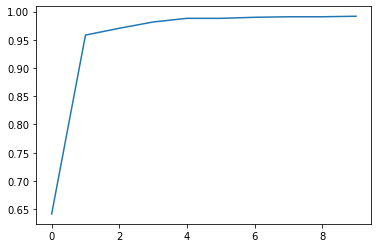

In [32]:
plt.plot(history.history['accuracy'])
plt.show()

In [33]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.4298 - accuracy: 0.9133


[0.42984944581985474, 0.9133333563804626]

In [34]:
# Predict

predict_tfidf = vectorizer.transform(["FREE entry to a fun contest", "Yup i will come over"])

print(predict_tfidf.shape)

(2, 4569)


In [36]:
prediction = np.argmax(model.predict(predict_tfidf), axis=1)

InvalidArgumentError: ignored